In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 상관관계
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df1 = pd.read_csv('data/titanic_train.csv')
df2 = pd.read_csv('data/titanic_test.csv')

In [3]:
total_df = pd.concat([df1, df2])
total_df.reset_index(inplace=True, drop=True)

In [4]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


- 1309 entries : 행이 1309개
- object 컬럼이 존재 : Name, Sex, Ticket, Cabin, Embarked

### 결측치 확인

In [5]:
# 결측치 확인
total_df.isna().sum() 

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [6]:
# 학습 데이터 결측치 확인
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# 예측 데이터에 대한 결측치
df2.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**결측치 있는 컬럼**
- Survived, Age, Fare, Cabin, Embarked

### 데이터 분석

#### PassengerId
- 승객 번호. 의미없음.
- 제거 대상

In [8]:
total_df.drop('PassengerId', axis=1, inplace=True)
total_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### Survived
- 예측 해야할 컬럼
- 예측 데이터에만 결측치 있음. 

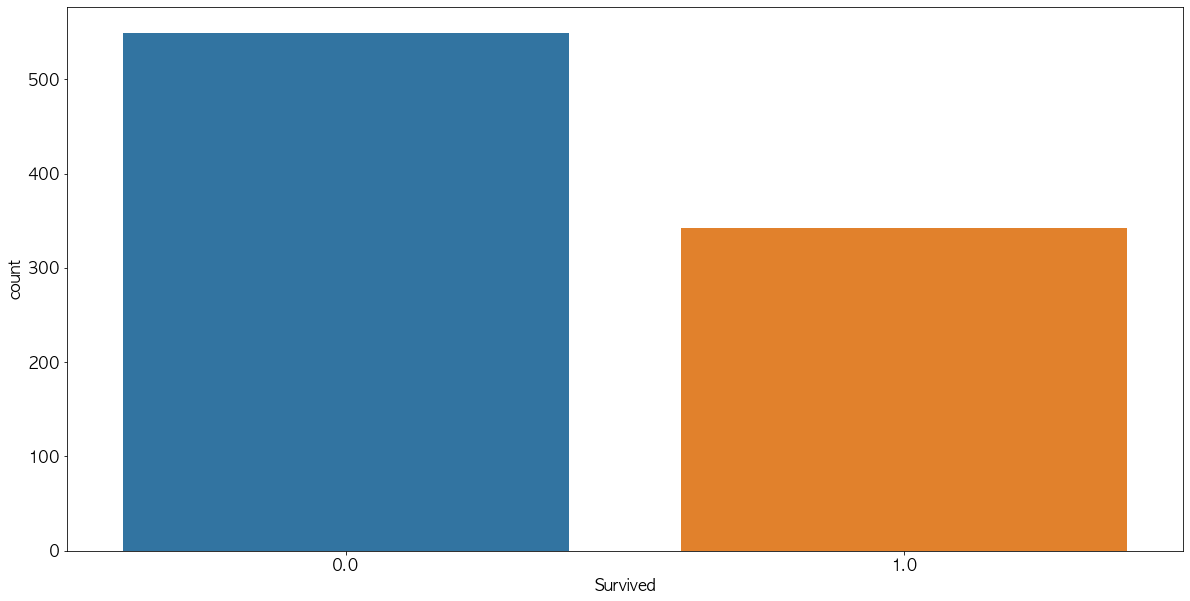

In [9]:
sns.countplot(data=total_df, x='Survived')
plt.show()

#### Age

In [10]:
# Age(나이)의 종류 확인
total_df['Age'].value_counts()

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64

In [11]:
# Age(나이)의 종류가 98가지나 되므로 연령대(Age2)를 구한다.
total_df['Age2'] = total_df['Age'] // 10 * 10
total_df['Age2'].value_counts()

20.0    344
30.0    232
10.0    143
40.0    135
0.0      82
50.0     70
60.0     32
70.0      7
80.0      1
Name: Age2, dtype: int64

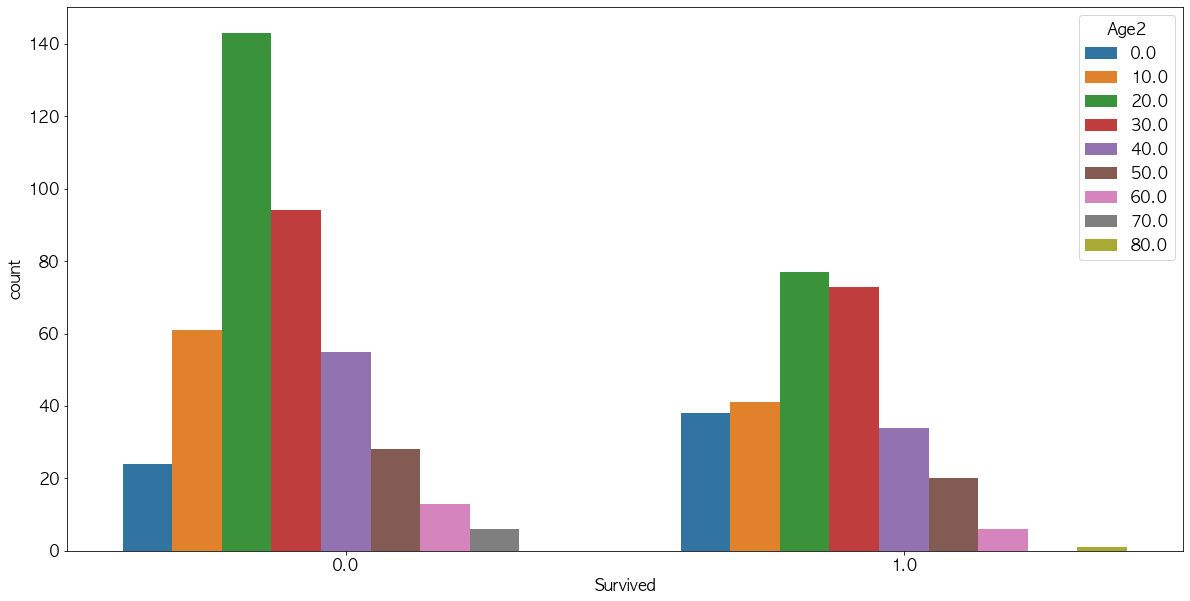

In [12]:
# Survived, Age2 간의 관계 확인
sns.countplot(data=total_df, x='Survived', hue='Age2')
plt.show()

- 연령대는 생존 관계없이 고루 분포되어 있다.

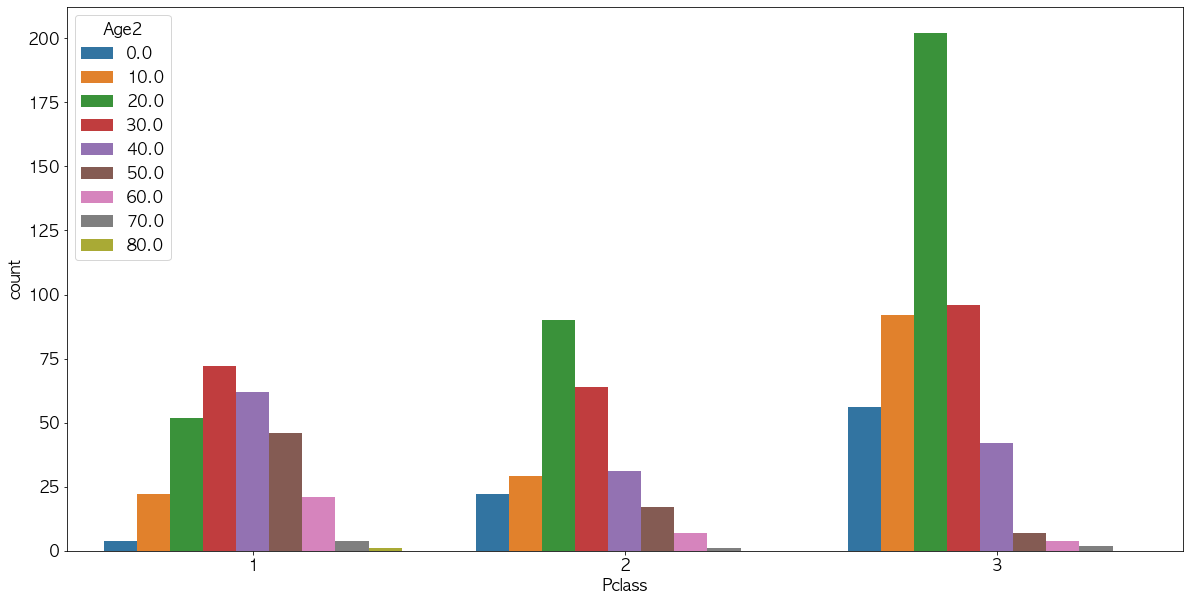

In [13]:
# Pclass, Age2 간의 관계 확인
sns.countplot(data=total_df, x='Pclass', hue='Age2')
plt.show()

- 3rd 클래스에는 20대가 많이 있다. 

In [14]:
# Name
# Master., Mr., Mrs., Miss 가 있을 때 나이 정보 확인하기
total_df['Name'].head(30)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [15]:
total_df["isMaster"] = total_df['Name'].str.contains("Master.", regex=False)
a1 = total_df.query('isMaster == True')
a1["Age2"].isna().sum()

8

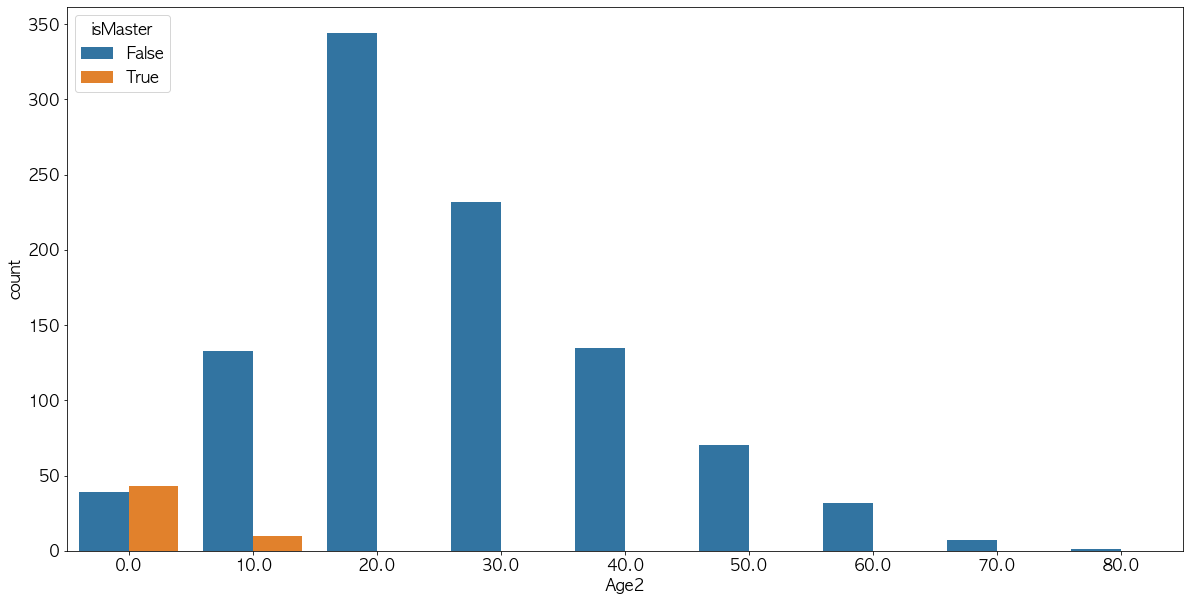

In [16]:
# isMaster, Age2 간의 관계 확인
sns.countplot(data=total_df, x='Age2', hue='isMaster')
plt.show()

- Master는 0, 10대에 존재한다. 
- 20대 이후에는 존재 하지 않는다. 

In [17]:
total_df["isMr"] = total_df['Name'].str.contains("Mr.", regex=False)
a1 = total_df.query('isMr == True')
a1["Age2"].isna().sum()

176

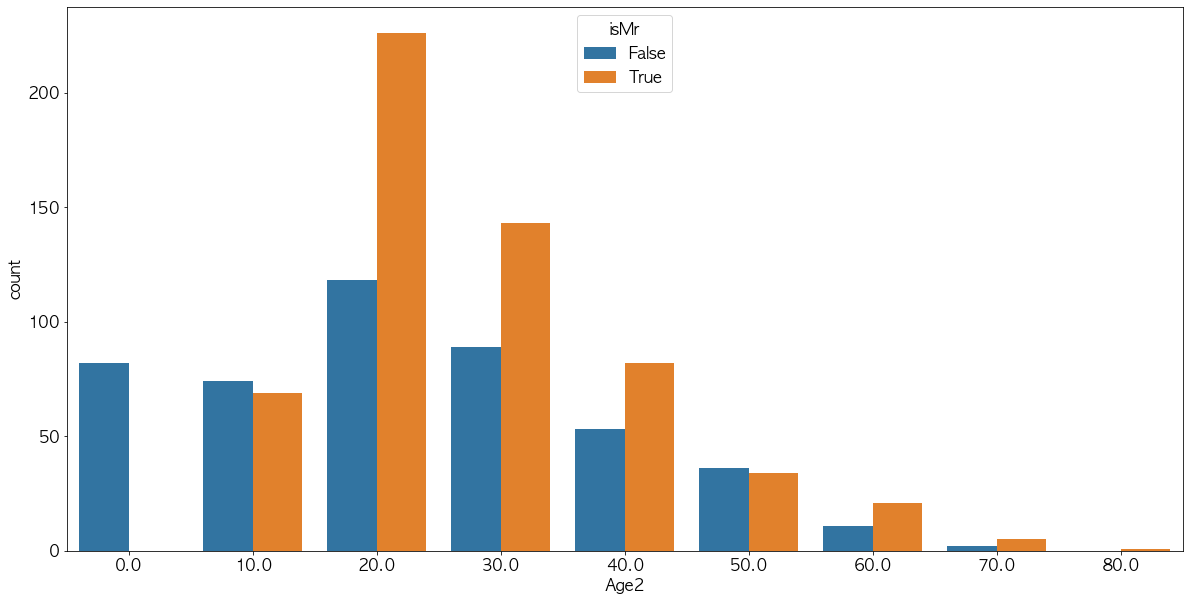

In [18]:
# isMr, Age2 간의 관계 확인
sns.countplot(data=total_df, x='Age2', hue='isMr')
plt.show()

- Mr는 0에 존재하지 않는다. 

In [19]:
total_df["isMrs"] = total_df['Name'].str.contains("Mrs.", regex=False)
a1 = total_df.query('isMrs == True')
a1["Age2"].isna().sum()

27

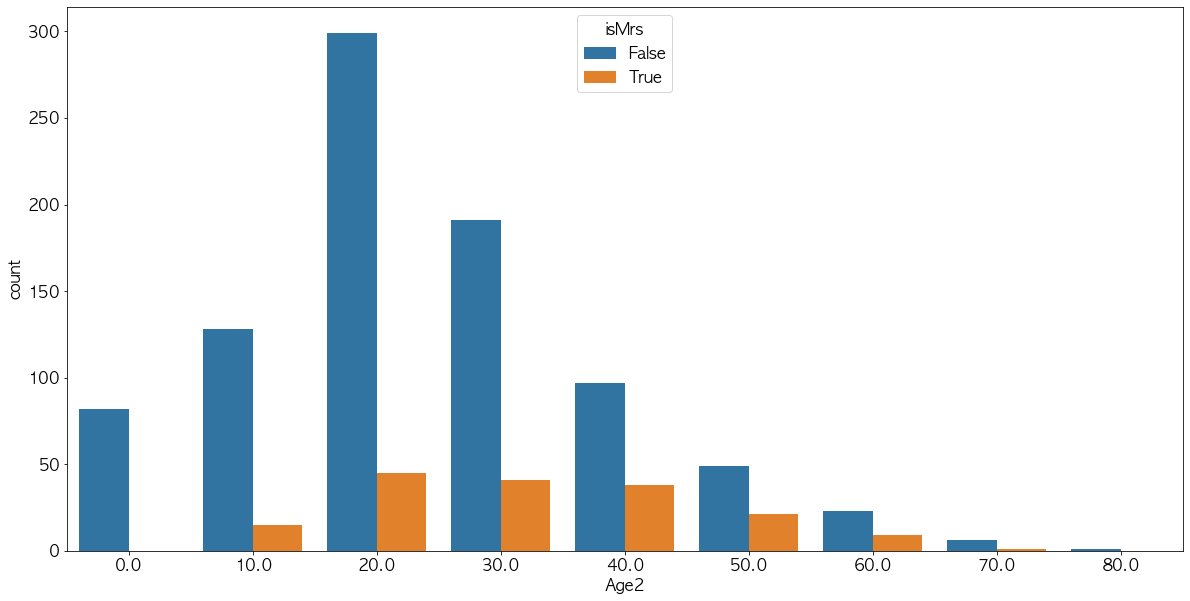

In [20]:
# isMrs, Age2 간의 관계 확인
sns.countplot(data=total_df, x='Age2', hue='isMrs')
plt.show()

- Mrs는 0대와 80대에 존재하지 않는다. 
- Mrs는 10대 - 70대에 분포해있다.

In [21]:
total_df["isMiss"] = total_df['Name'].str.contains("Miss.", regex=False)
a1 = total_df.query('isMiss == True')
a1["Age2"].isna().sum()

50

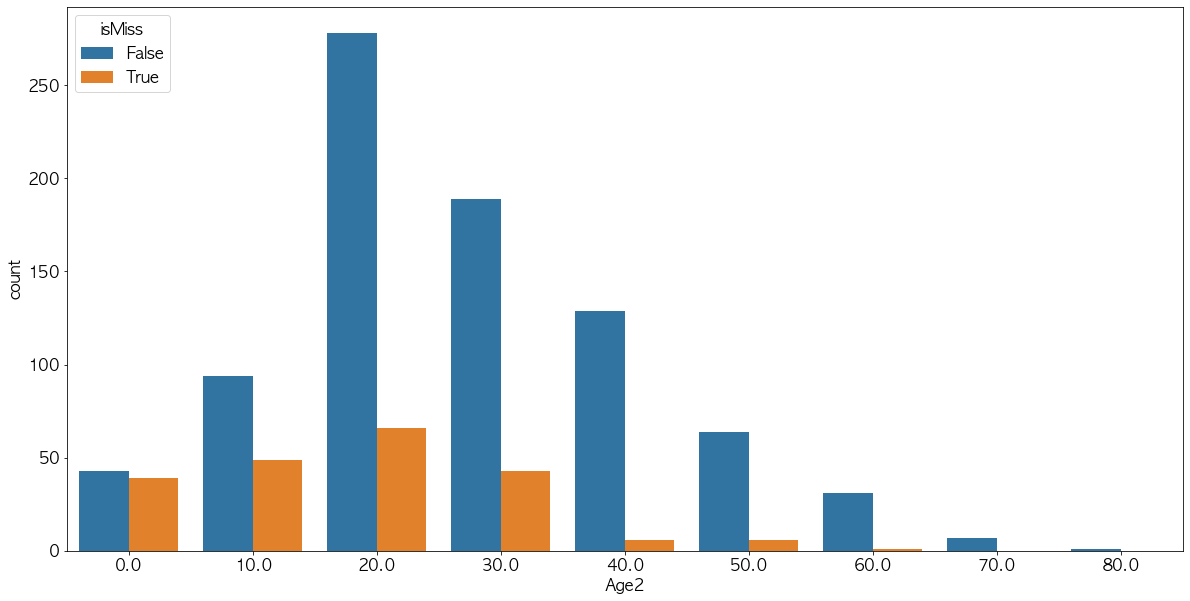

In [22]:
# isMiss, Age2 간의 관계 확인
sns.countplot(data=total_df, x='Age2', hue='isMiss')
plt.show()

- Miss는 0대와 60대 사이에 존재한다. 

In [23]:
total_df["isMs"] = total_df['Name'].str.contains("Ms.", regex=False)
a1 = total_df.query('isMs == True')
a1["Age2"].isna().sum()
a1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2,isMaster,isMr,isMrs,isMiss,isMs
443,1.0,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.00,NaN,S,20.0,False,False,False,False,True
979,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,NaN,False,False,False,False,True


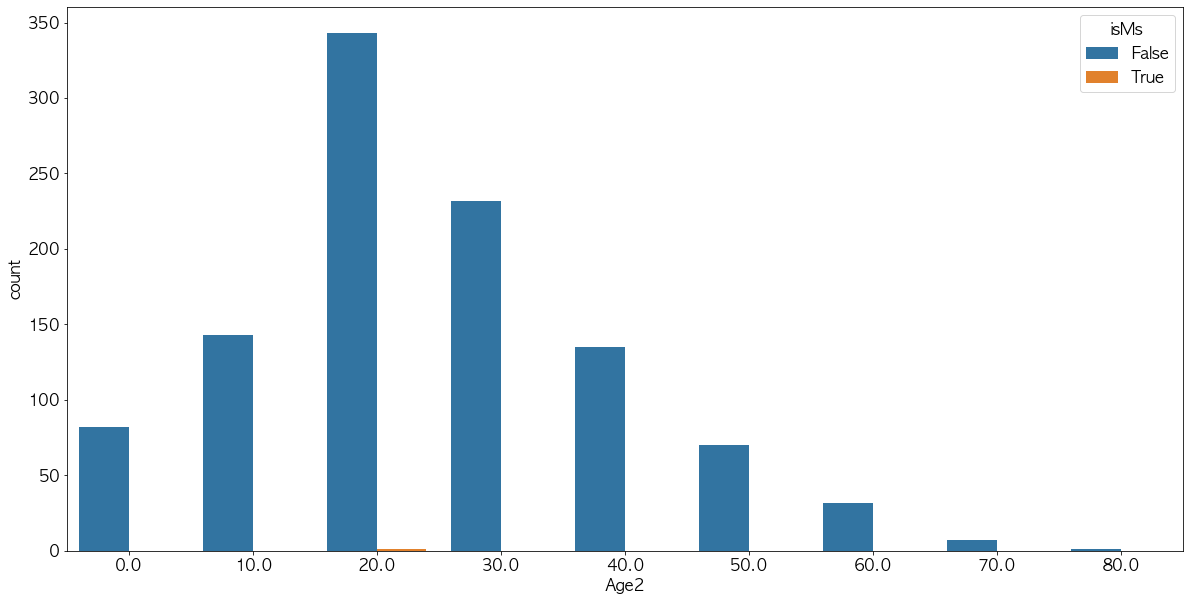

In [24]:
# isMs, Age2 간의 관계 확인
sns.countplot(data=total_df, x='Age2', hue='isMs')
plt.show()

- Ms는 20대에만 존재한다. 

In [25]:
total_df["isDr"] = total_df['Name'].str.contains("Dr.", regex=False)
a1 = total_df.query('isDr == True')
a1["Age2"].isna().sum()
a1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2,isMaster,isMr,isMrs,isMiss,isMs,isDr
245,0.0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,40.0,False,False,False,False,False,True
317,0.0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,50.0,False,False,False,False,False,True
398,0.0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,20.0,False,False,False,False,False,True
632,1.0,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,30.0,False,False,False,False,False,True
660,1.0,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,50.0,False,False,False,False,False,True
766,0.0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,False,False,False,False,False,True
796,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,40.0,False,False,False,False,False,True
1184,NaN,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S,50.0,False,False,False,False,False,True


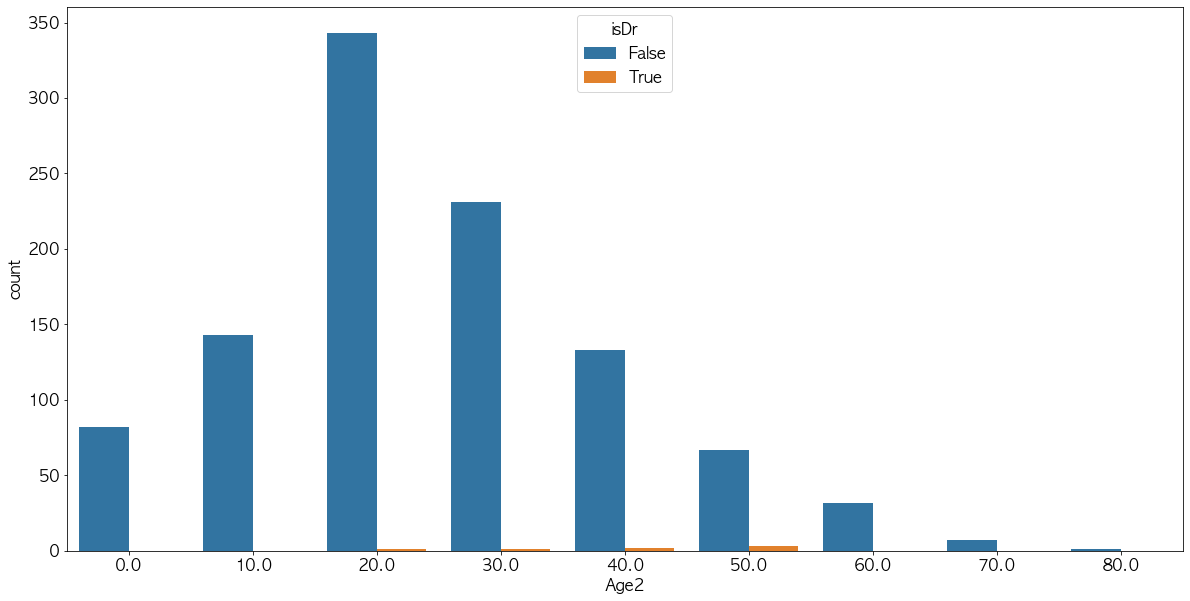

In [26]:
# isDr, Age2 간의 관계 확인
sns.countplot(data=total_df, x='Age2', hue='isDr')
plt.show()

- Dr. 프리픽스를 가진 사람들은 20대 - 50대에 존재한다. 
- 하지만, 어느 한 쪽에 더 많지 않고 고르게 분포해 있기 때문에 결측치 유추 과정에 큰 도움이 되지 않을것 같다. 

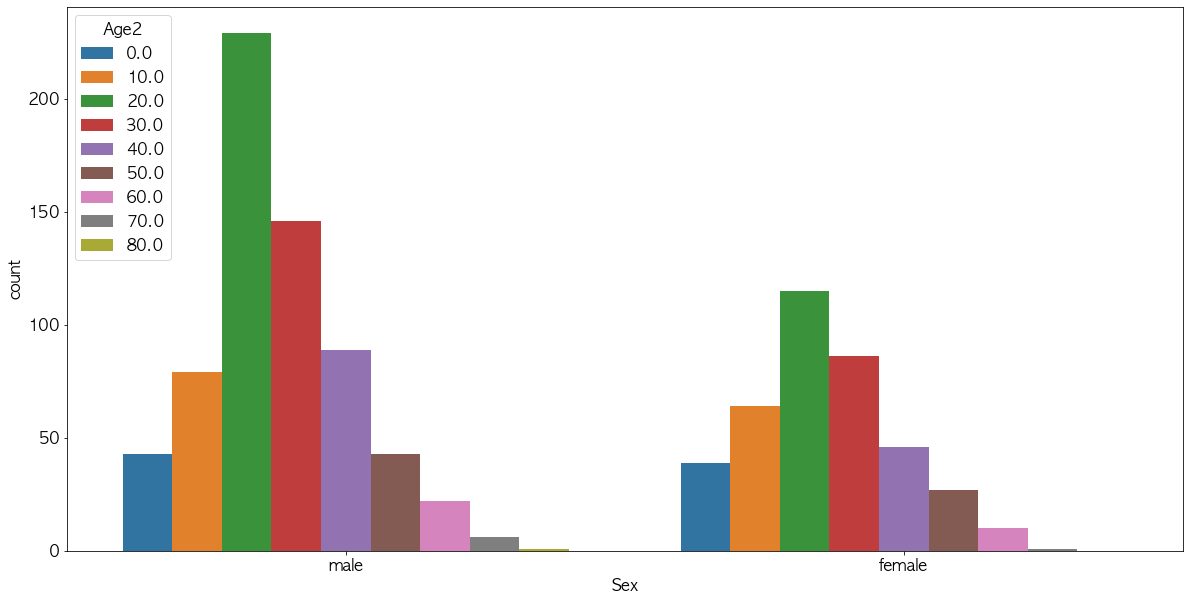

In [27]:
# Sex, Age2 간의 관계 확인
sns.countplot(data=total_df, x='Sex', hue='Age2')
plt.show()

- 연령대는 성별 관계없이 고루 분포되어 있다.

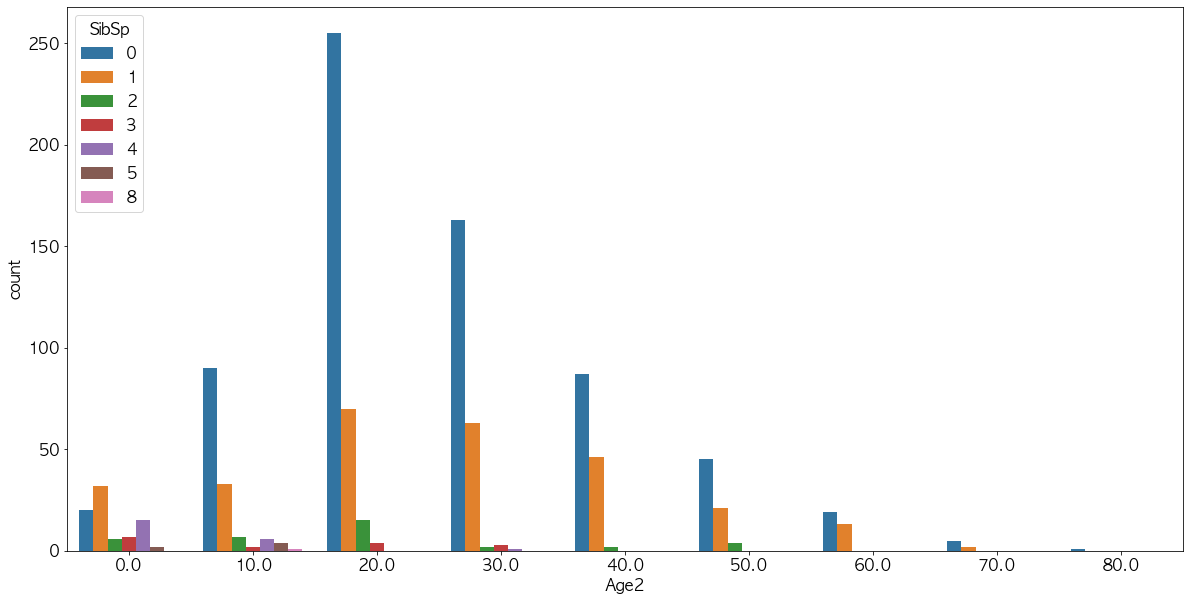

In [28]:
# SibSp, Age2 간의 관계 확인
sns.countplot(data=total_df, hue='SibSp', x='Age2')
plt.show()

<!-- - 형재 자매 수로 나이를 예측하긴 어려울거 같다.  -->
- 형재 자매 수가 0인 경우
    - 0대 ~ 80대 존재
- 형재 자매 수가 1인 경우
    - 0대 ~ 70대 존재
- 형재 자매 수가 2인 경우
    - 0대 ~ 50대 존재
- 형재 자매 수가 3인 경우
    - 0대 ~ 30대 존재
- 형재 자매 수가 4인 경우
    - 0대, 10대, 30대 존재
- 형재 자매 수가 5인 경우
    - 0대, 10대 존재
 - 형재 자매 수가 8인 경우
    - 10대 존재

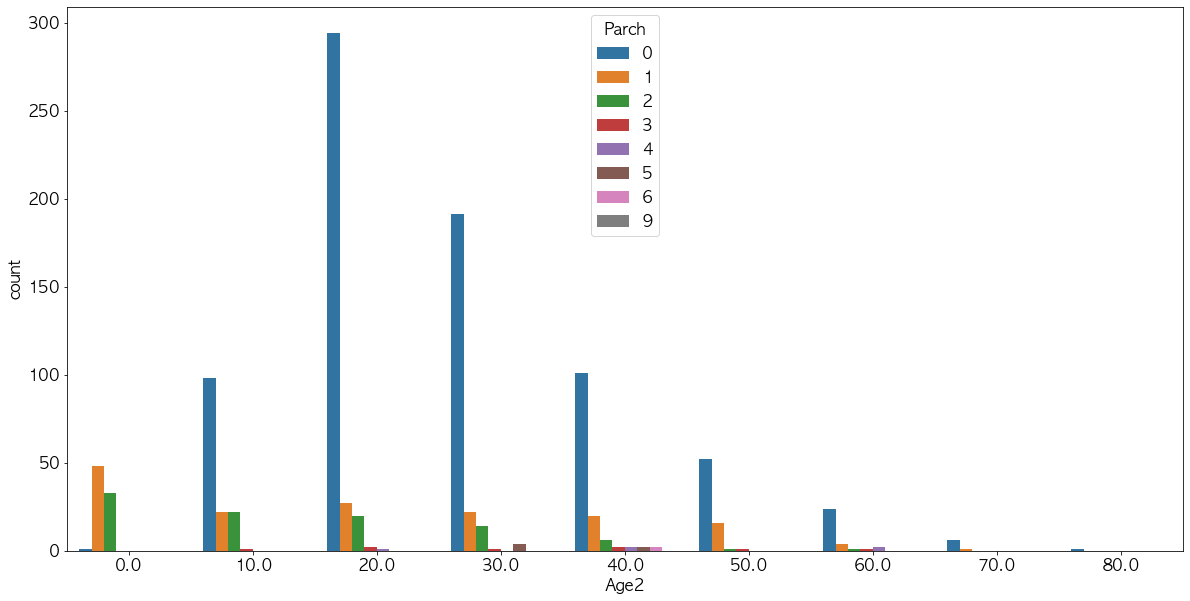

In [29]:
# Parch, Age2 간의 관계 확인
sns.countplot(data=total_df, hue='Parch', x='Age2')
plt.show()

- 0대
    - 동승한 부모, 자식이 없거나 1-2명 존재한다. 
- 10대 ~ 50대
    - 동승한 부모, 자식이 없거나 3명 이하 존재한다.
    
- 동승한 부모 자식이 4명 있는 사람
    - 20대, 40대, 60대
- 동승한 부모 자식이 5명 있는 사람
    - 30대, 40대
- 동승한 부모 자식이 6명 있는 사람
    - 40대

In [30]:
total_df["Ticket"]

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
               ...        
1304             A.5. 3236
1305              PC 17758
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: Ticket, Length: 1309, dtype: object

In [31]:
# Ticket이 너무 다양하게 있어서 
# Ticket_Letter는 Ticket에 있는 글만 얻기
# Ticket_Num는 Ticket 끝에 있는 숫자만 얻기
total_df["Ticket_Letter"] = total_df['Ticket'].str.replace('\d+', '')
total_df["Ticket_Letter"] = total_df["Ticket_Letter"].str.replace('\/', '')
total_df["Ticket_Letter"] = total_df["Ticket_Letter"].str.replace('.','')
total_df["Ticket_Letter"] = total_df["Ticket_Letter"].str.replace(' ','')

total_df["Ticket_Num"] = total_df['Ticket'].str.extract('(\d+)$')

total_df["Ticket_Letter"].value_counts()
total_df["Ticket_Num"].value_counts()

2343       11
2144        8
1601        8
17608       7
14879       7
           ..
2816        1
3101306     1
113792      1
36209       1
359309      1
Name: Ticket_Num, Length: 923, dtype: int64

- 너무 다양하게 있어서 Age2를 예측하기에는 어려움

In [32]:
total_df['Fare'].sort_values().value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.8750      1
8.0292      1
8.1375      1
8.1583      1
10.7083     1
Name: Fare, Length: 281, dtype: int64

In [33]:
# 요금 구간 정하기
def fare2(fare):
    fare2 = []
    for price in fare:
        if price <= 10:
            fare2.append("~10")
        elif price <= 20:
            fare2.append("~20")
        elif price <= 30:
            fare2.append("~30")
        elif price <= 40:
            fare2.append("~40")
        elif price <= 50:
            fare2.append("~50")
        elif price <= 100:
            fare2.append("~100")
        elif price <= 250:
            fare2.append("~250")
        elif price <= 500:
            fare2.append("~500")
        elif price > 500:
            fare2.append("500+")
        else:
            fare2.append(price)
    return fare2

In [34]:
# Fare(요금)의 종류가 281 가지나 되므로 요금 구간(Fare2)를 구한다.
total_df['Fare2'] = fare2(total_df['Fare'])
total_df['Fare2'].value_counts()

~10     491
~20     261
~30     213
~100    156
~40      79
~250     67
~50      24
~500     13
500+      4
Name: Fare2, dtype: int64

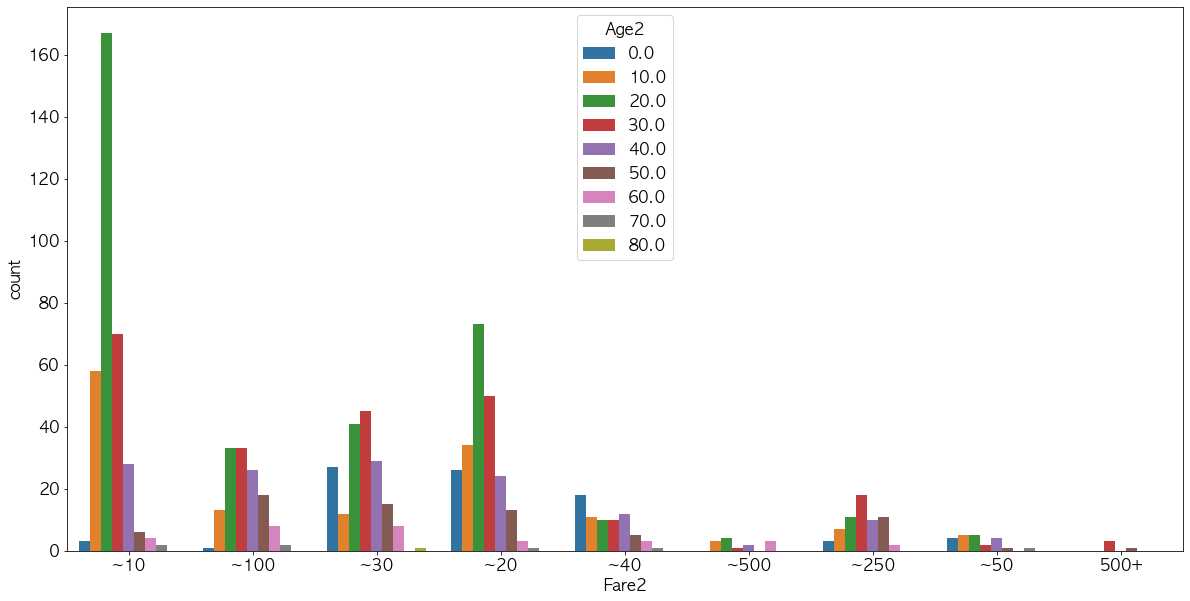

In [35]:
# Fare2, Age2 간의 관계 확인
sns.countplot(data=total_df, x='Fare2', hue='Age2')
plt.show()

- 연령대는 요금 관계없이 고루 분포되어 있다.
- 20대는 10이하의 돈을 지불한 사람이 방 정도 된다. 

In [36]:
total_df['Cabin2'] = total_df['Cabin'].astype(str).str[0]
a1 = total_df[['Cabin2', 'Age2']]
indexNames = a1[ a1['Cabin2'] == 'n' ].index
a1.drop(indexNames , inplace=True)

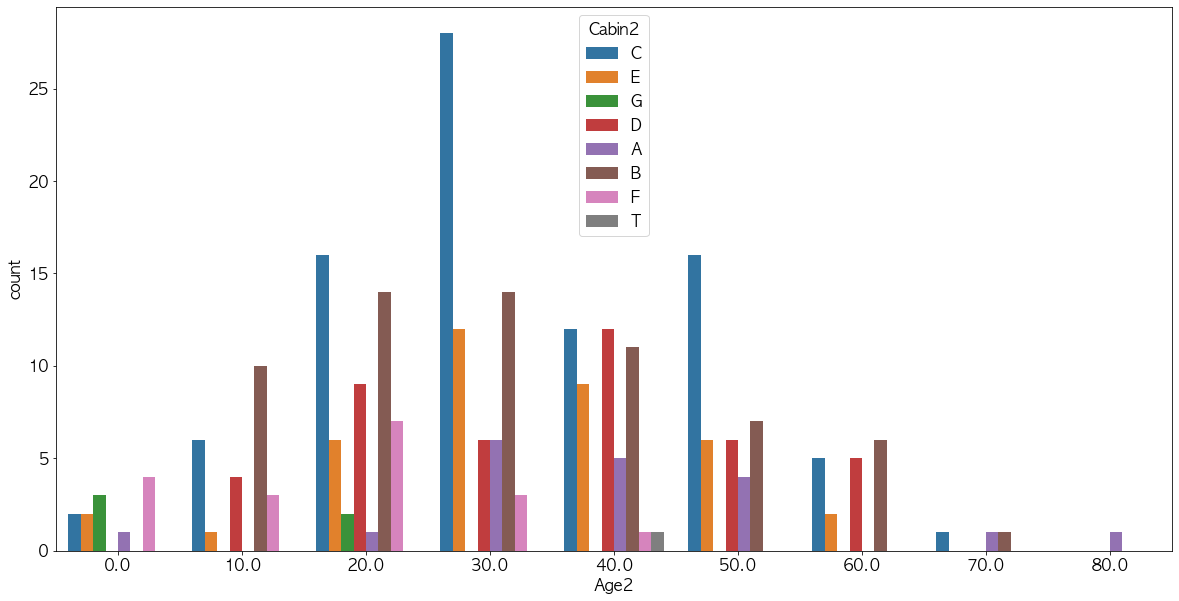

In [37]:
# Cabin2, Age2 간의 관계 확인
sns.countplot(data=a1, hue='Cabin2', x='Age2')
plt.show()

- 0대는 C, E, G, A, F 객실을 사용하였다. 
- 10대는 C, E, D, B, F 객실을 사용하였다. 
- 30대 - 50대 사람들이 A 객실을 다른 연령대에 비해 많이 사용하였다. 
- 0대와 20대만 G 객실을 사용하였다. 

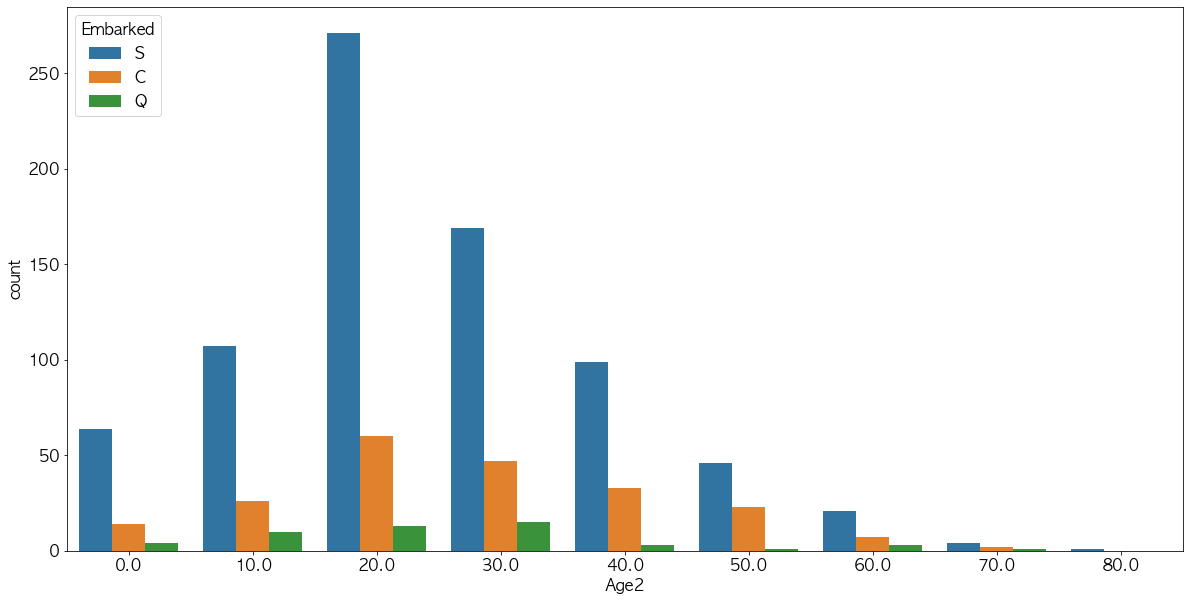

In [38]:
# Embarked, Age2 간의 관계 확인
sns.countplot(data=total_df, hue='Embarked', x='Age2')
plt.show()

- 연령대는 선착장에 관계 없이 비슷하게 분포되어 있다.

In [39]:
total_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,isMaster,isMr,isMrs,isMiss,isMs,isDr,Ticket_Letter,Ticket_Num,Fare2,Cabin2
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,False,True,False,False,False,False,A,21171,~10,n
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,False,False,True,False,False,False,PC,17599,~100,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,False,False,False,True,False,False,STONO,3101282,~10,n
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,False,False,True,False,False,False,,113803,~100,C
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,False,True,False,False,False,False,,373450,~10,n


In [40]:
# isMaster 가 True인 사람들은 모두 0로 채워준다.
# isMaster가 True인 사람들을 가져온다.
a1 = total_df.query('isMaster == True')
# 이 사람들에 대해 Age2가 결측치인 사람들을 가져온다.
a2 = a1[a1['Age2'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'Age2'] = 0

total_df['Age2'].isna().sum()

255

In [41]:
# isMs 가 True인 사람들은 모두 20대로 채워준다.
# isMs가 True인 사람들을 가져온다.
a1 = total_df.query('isMs == True')
# 이 사람들에 대해 Age2가 결측치인 사람들을 가져온다.
a2 = a1[a1['Age2'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'Age2'] = 20

total_df['Age2'].isna().sum()

254

In [42]:
# Fare2 가 ~10인 사람들은 모두 20대로 채워준다. (많기 때문)
# Fare2가 ~10인 사람들을 가져온다.
a1 = total_df.query('Fare2 == "~10"')
# 이 사람들에 대해 Age2가 결측치인 사람들을 가져온다.
a2 = a1[a1['Age2'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'Age2'] = 20

total_df['Age2'].isna().sum()

103

In [43]:
# Pclass 가 3인 사람들은 모두 20대로 채워준다. (많기 때문)
# Pclass가 3인 사람들을 가져온다.
a1 = total_df.query('Pclass == 3')
# 이 사람들에 대해 Age2가 결측치인 사람들을 가져온다.
a2 = a1[a1['Age2'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'Age2'] = 20

total_df['Age2'].isna().sum()

46

In [44]:
total_df['Age2'].value_counts()

20.0    553
30.0    232
10.0    143
40.0    135
0.0      90
50.0     70
60.0     32
70.0      7
80.0      1
Name: Age2, dtype: int64

In [45]:
# 20대가 많긴 하지만 결측치를 20대로 했기 때문에 다른 연령대 보다 20대가 많은거라 남은 46을 어떻게 해야할지 모르겠다.
# 그래도 남은 결측치의 수가 많지 않기 때문에 남은 것들은 20로 채워준다.
a1 = total_df[total_df['Age2'].isna()].index
total_df.loc[a1, 'Age2'] = 20
total_df['Age2'].isna().sum()

0

### Fare2

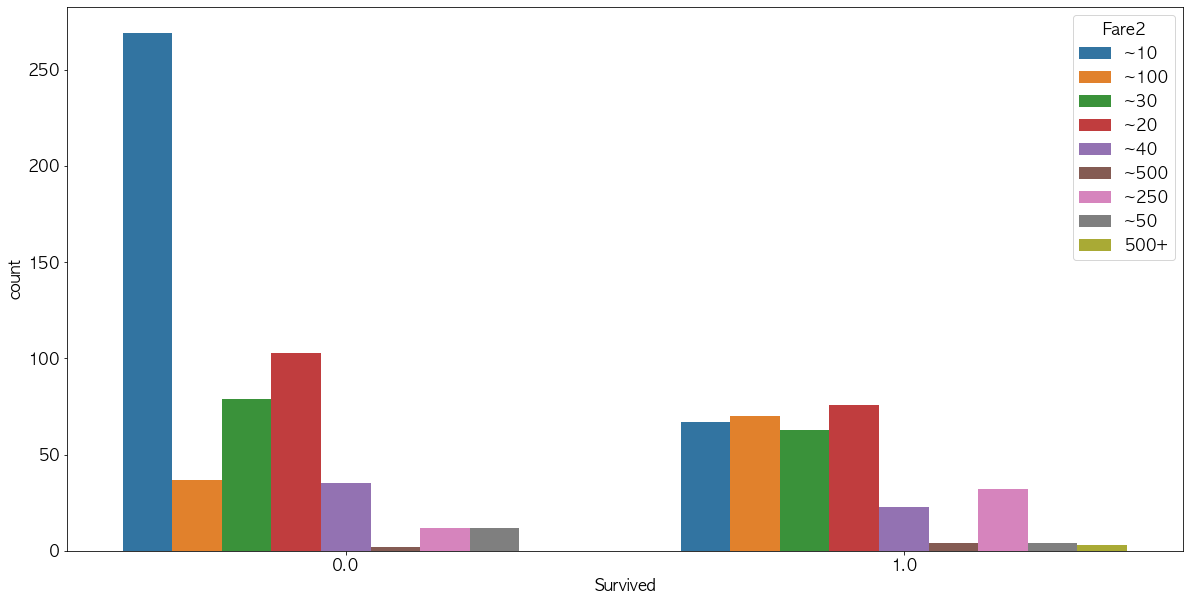

In [46]:
# Survived, Fare2 간의 관계 확인
sns.countplot(data=total_df, x='Survived', hue='Fare2')
plt.show()

- 10불 이하의 돈을 지불한 사람들은 생존할 확률이 낮다. 

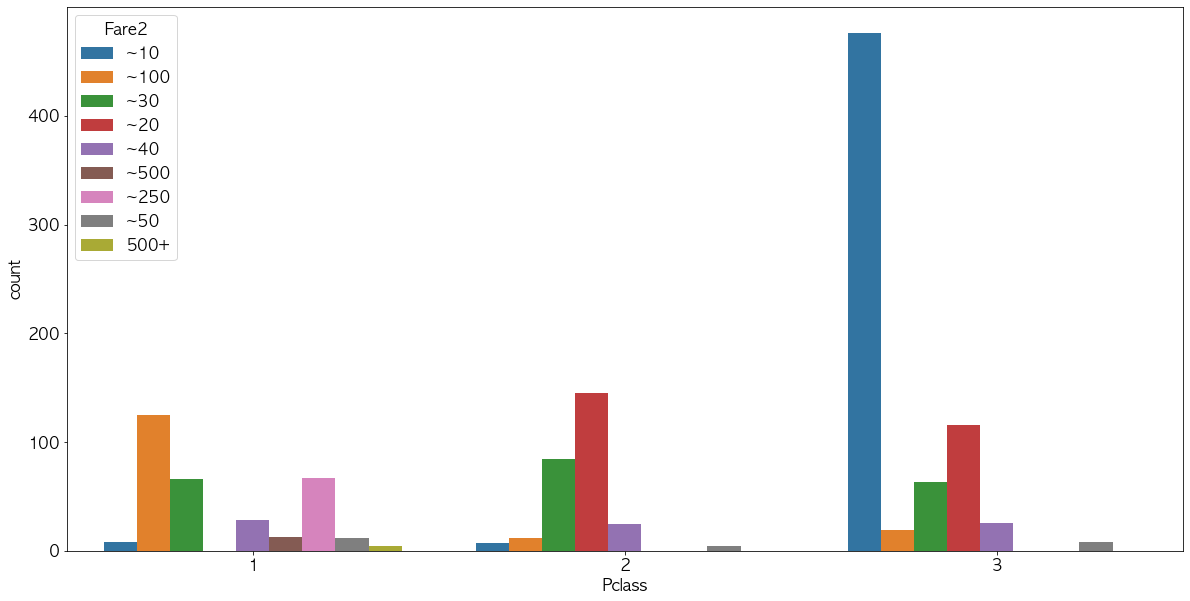

In [47]:
# Pclass, Fare2 간의 관계 확인
sns.countplot(data=total_df, x='Pclass', hue='Fare2')
plt.show()

- 1st 클래스를 탄 사람들은 20불 이상의 돈을 지불 했다. 
- 10불 이하 요금을 낸 사람들은 3rd 클래스일 확률이 높다. 

In [48]:
# Pclass 가 3인 사람들은 모두 ~10으로 채워준다. (많기 때문)
# Pclass가 3인 사람들을 가져온다.
a1 = total_df.query('Pclass == 3')
# 이 사람들에 대해 Fare2가 결측치인 사람들을 가져온다.
a2 = a1[a1['Fare2'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'Fare2'] = "~10"

total_df['Fare2'].isna().sum()

0

### Embarked

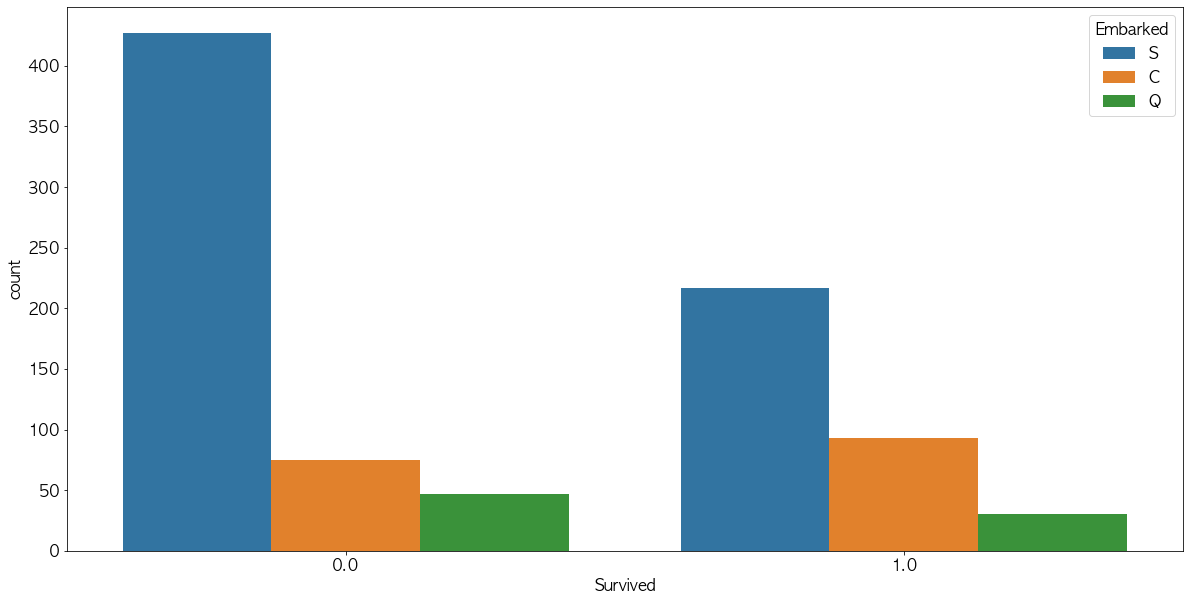

In [49]:
# Survived, Embarked 간의 관계 확인
sns.countplot(data=total_df, x='Survived', hue='Embarked')
plt.show()

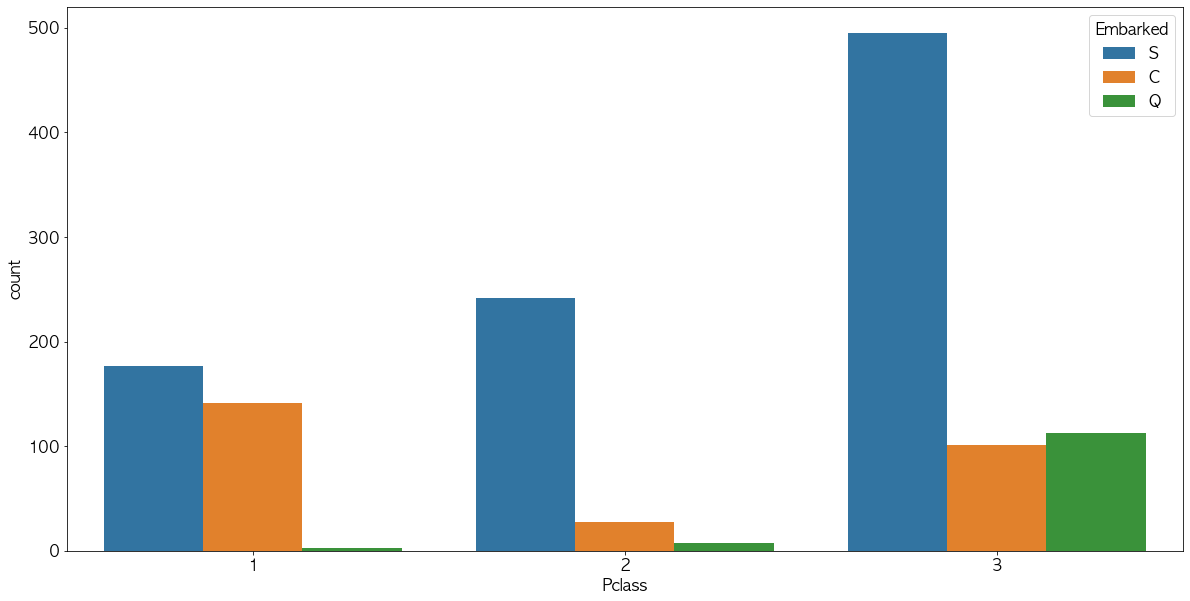

In [50]:
# Pclass, Embarked 간의 관계 확인
sns.countplot(data=total_df, x='Pclass', hue='Embarked')
plt.show()

- Q 선착장에서 탄 사람들은 높은 확률로 3rd 클래스에 탔다. 

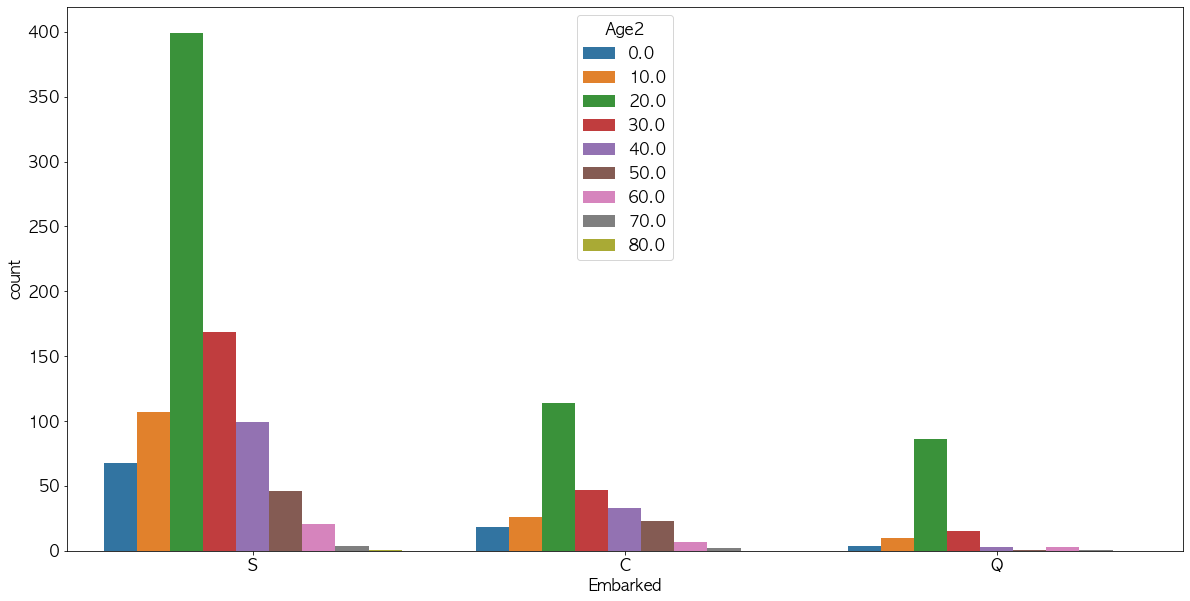

In [51]:
# Age, Embarked 간의 관계 확인
sns.countplot(data=total_df, hue='Age2', x='Embarked')
plt.show()

- 연령대는 선착장에 관계 없이 비슷하게 분포되어 있다.

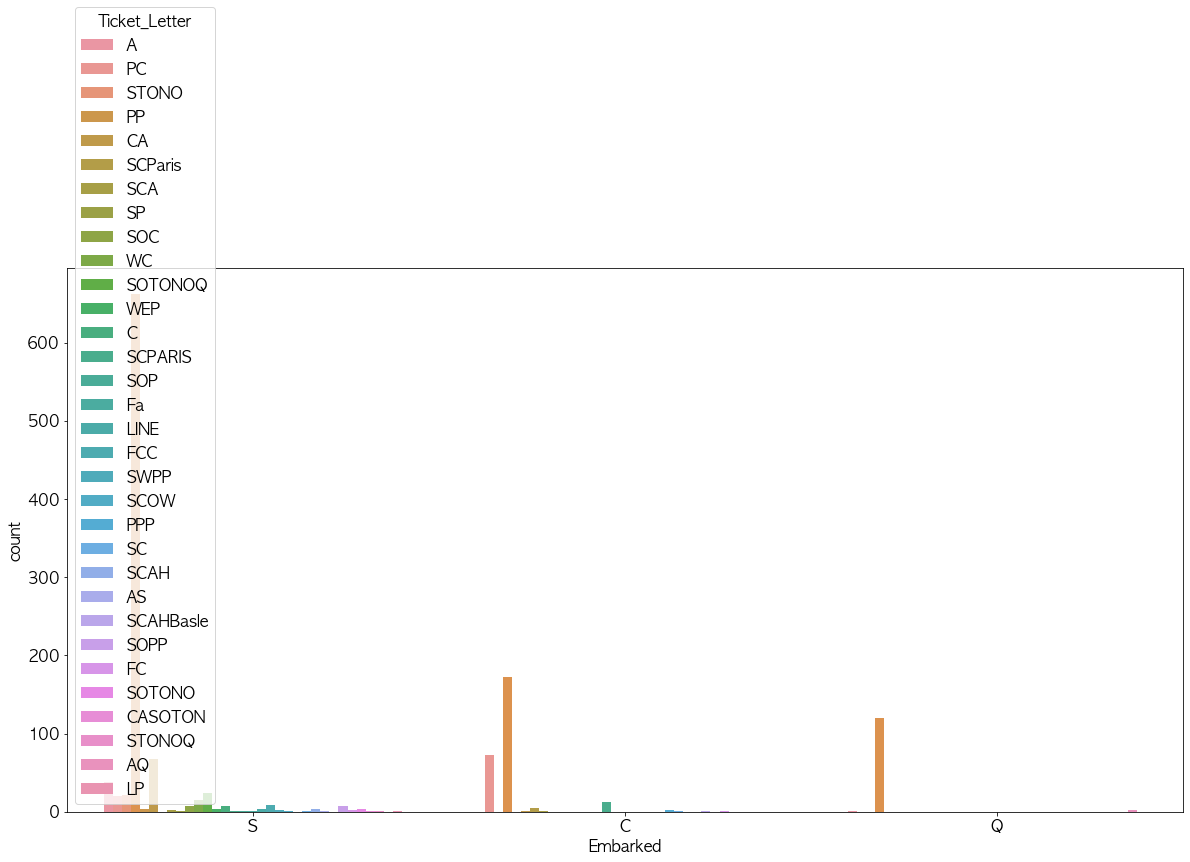

In [52]:
# Ticket_Letter, Embarked 간의 관계 확인
sns.countplot(data=total_df, hue='Ticket_Letter', x='Embarked')
plt.show()

- Ticket_Letter이 PP일 때 S 선착장일 확률이 높다. 

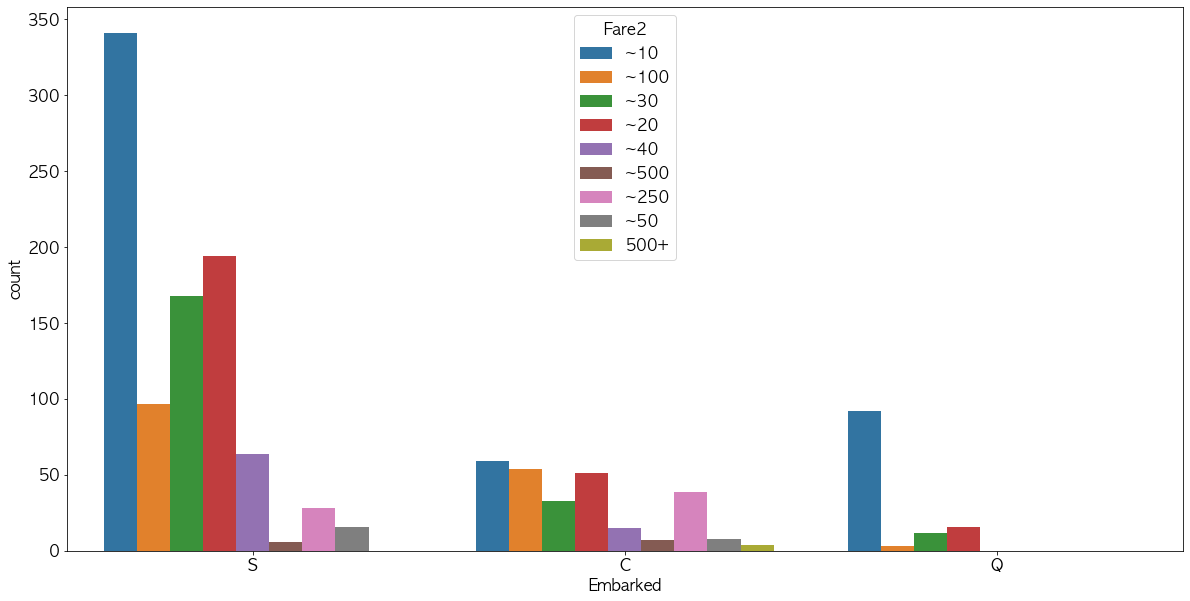

In [53]:
# Fare2, Embarked 간의 관계 확인
sns.countplot(data=total_df, hue='Fare2', x='Embarked')
plt.show()

- 요금을 10불 이하로 낸 사람들은 S Cabin일 확률이 높다. 
- 30-40불 사이로 낸 사람들은 S 객실일 확률이 높다. 

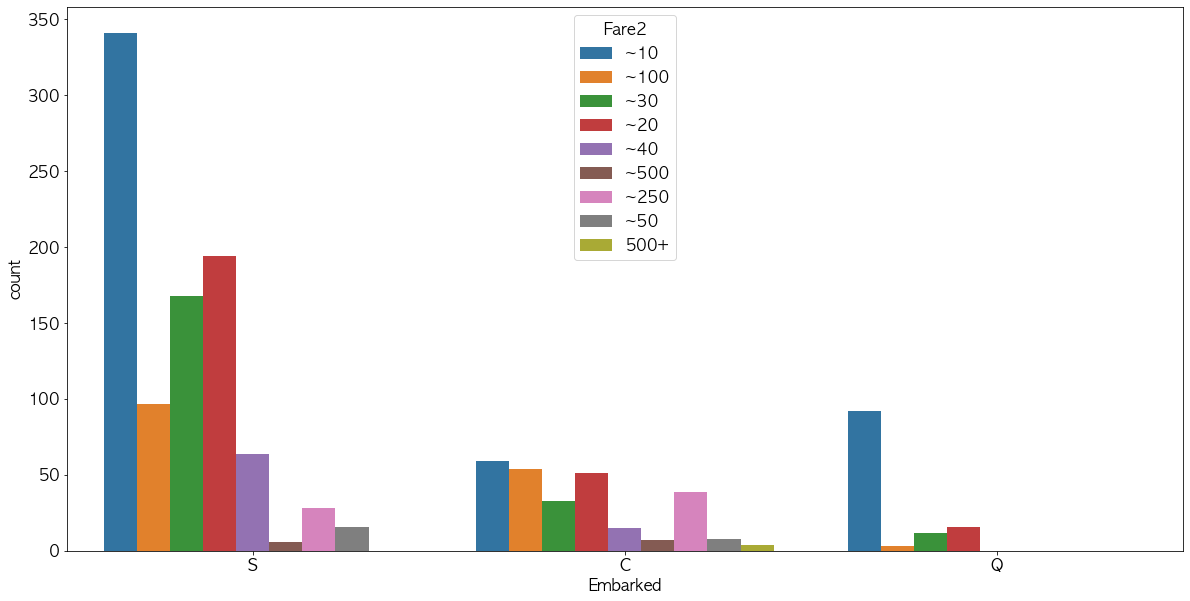

In [54]:
# Fare2, Embarked 간의 관계 확인
sns.countplot(data=total_df, hue='Fare2', x='Embarked')
plt.show()

In [55]:
# Pclass 가 3인 사람들은 모두 Q로 채워준다. (많기 때문)
# Pclass가 3인 사람들을 가져온다.
a1 = total_df.query('Pclass == 3')
# 이 사람들에 대해 Embarked가 결측치인 사람들을 가져온다.
a2 = a1[a1['Embarked'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'Embarked'] = "Q"

total_df['Embarked'].isna().sum()

2

In [56]:
# Ticket_Letter 가 PP인 사람들은 모두 Q로 채워준다. (많기 때문)
# Ticket_Letter가 PP인 사람들을 가져온다.
a1 = total_df.query('Ticket_Letter == "PP"')
# 이 사람들에 대해 Embarked가 결측치인 사람들을 가져온다.
a2 = a1[a1['Embarked'].isna()]
# 결측치를 채워준다.
total_df.loc[a2.index, 'Embarked'] = "S"

total_df['Embarked'].isna().sum()

2

In [57]:
total_df[total_df['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,isMaster,isMr,isMrs,isMiss,isMs,isDr,Ticket_Letter,Ticket_Num,Fare2,Cabin2
61,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,...,False,False,False,True,False,False,,113572,~100,B
829,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,...,False,False,True,False,False,False,,113572,~100,B


In [58]:
total_df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [59]:
# 결측치의 수가 많지 않기 때문에 남은 것들은 S로 채워준다.
a1 = total_df[total_df['Embarked'].isna()].index
total_df.loc[a1, 'Embarked'] = 'S'
total_df['Embarked'].isna().sum()

0

### Cabin

In [60]:
total_df['Cabin2'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin2, dtype: int64

In [61]:
total_df['Cabin2'] = total_df['Cabin'].astype(str).str[0]
a1 = total_df
indexNames = a1[ a1['Cabin2'] == 'n' ].index
a1.drop(indexNames , inplace=True)

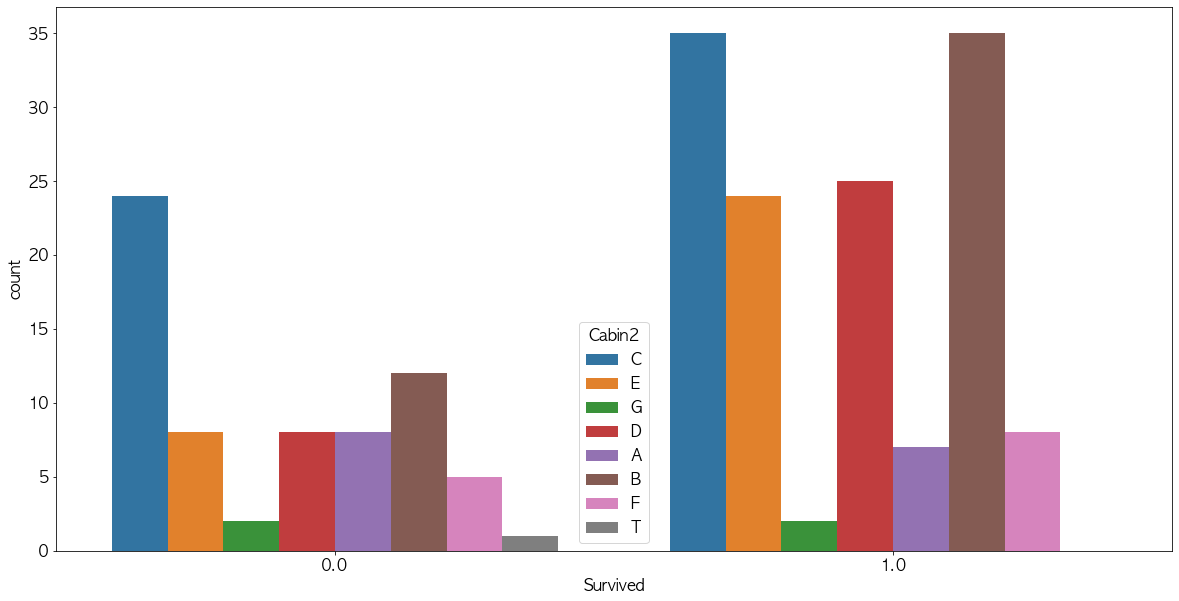

In [62]:
# Cabin2, Survived 간의 관계 확인
sns.countplot(data=a1, x='Survived', hue='Cabin2')
plt.show()

- C, E, D, B 객실은 생존 확률이 높다. 

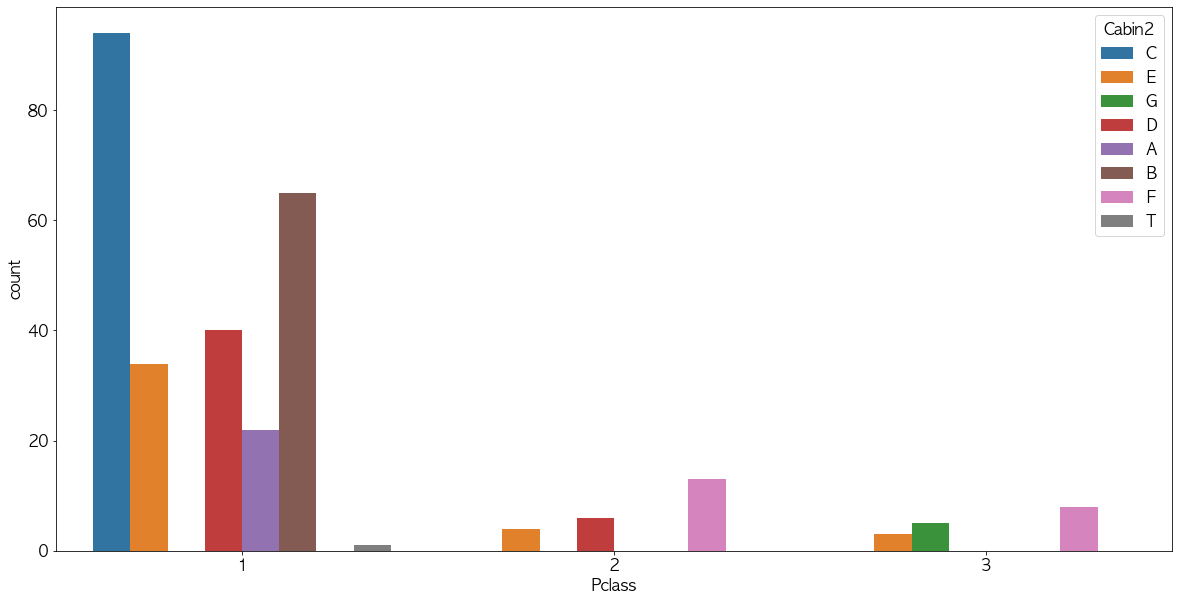

In [63]:
# Cabin2, Pclass 간의 관계 확인
sns.countplot(data=a1, x='Pclass', hue='Cabin2')
plt.show()

- A, B, C, F 객실은 1st 클래스이다. 
- D 객실은 1st, 2nd 클래스이다. 
- E 객실은 모든 클래스이다. 
- F 객실은 2nd, 3rd 클래스이다. 
- G 객실은 3rd 클래스이다. 

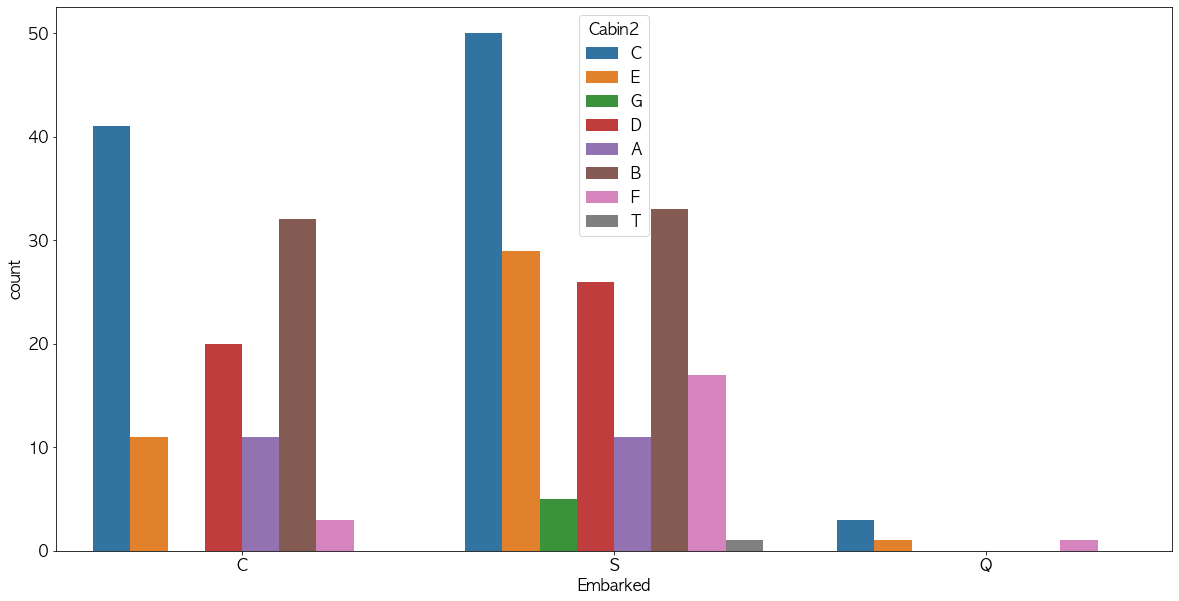

In [64]:
# Cabin2, Embarked 간의 관계 확인
sns.countplot(data=a1, x='Embarked', hue='Cabin2')
plt.show()

- G 객실을 사용한 사람들은 S 선착장이다. 
- D 객실은 C, S 선착장이다. 

- 1309행 중 1014이 결측치이기 때문에 Cabin 컬럼은 전부 드랍한다. 

In [65]:
total_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,isMaster,isMr,isMrs,isMiss,isMs,isDr,Ticket_Letter,Ticket_Num,Fare2,Cabin2
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,False,False,True,False,False,False,PC,17599,~100,C
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,False,False,True,False,False,False,,113803,~100,C
6,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,...,False,True,False,False,False,False,,17463,~100,E
10,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,...,False,False,False,True,False,False,PP,9549,~20,G
11,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,...,False,False,False,True,False,False,,113783,~30,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,...,False,True,False,False,False,False,,17765,~30,D
1296,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,...,False,True,False,False,False,False,SCPARIS,2166,~20,D
1298,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,...,False,True,False,False,False,False,,113503,~250,C
1302,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,...,False,False,True,False,False,False,,19928,~100,C
